In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")


In [ ]:
from pathlib import Path
import pandas as pd

# Project root directory
BASE_DIR = Path.cwd().parent

# Data path
DATA_PATH = BASE_DIR / "data" / "train_disease.csv"

df = pd.read_csv(DATA_PATH)

print("Dataset Shape:", df.shape)
df.head()


In [ ]:
# Drop unwanted unnamed column
df = df.drop(columns=["Unnamed: 133"], errors="ignore")

print("Dataset Shape after cleaning:", df.shape)
df.head()


In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Columns: 133 entries, itching to prognosis
dtypes: int64(132), object(1)
memory usage: 5.0+ MB


In [7]:
df.isnull().sum().sort_values(ascending=False).head(10)


itching                 0
skin_rash               0
nodal_skin_eruptions    0
continuous_sneezing     0
shivering               0
chills                  0
joint_pain              0
stomach_pain            0
acidity                 0
ulcers_on_tongue        0
dtype: int64

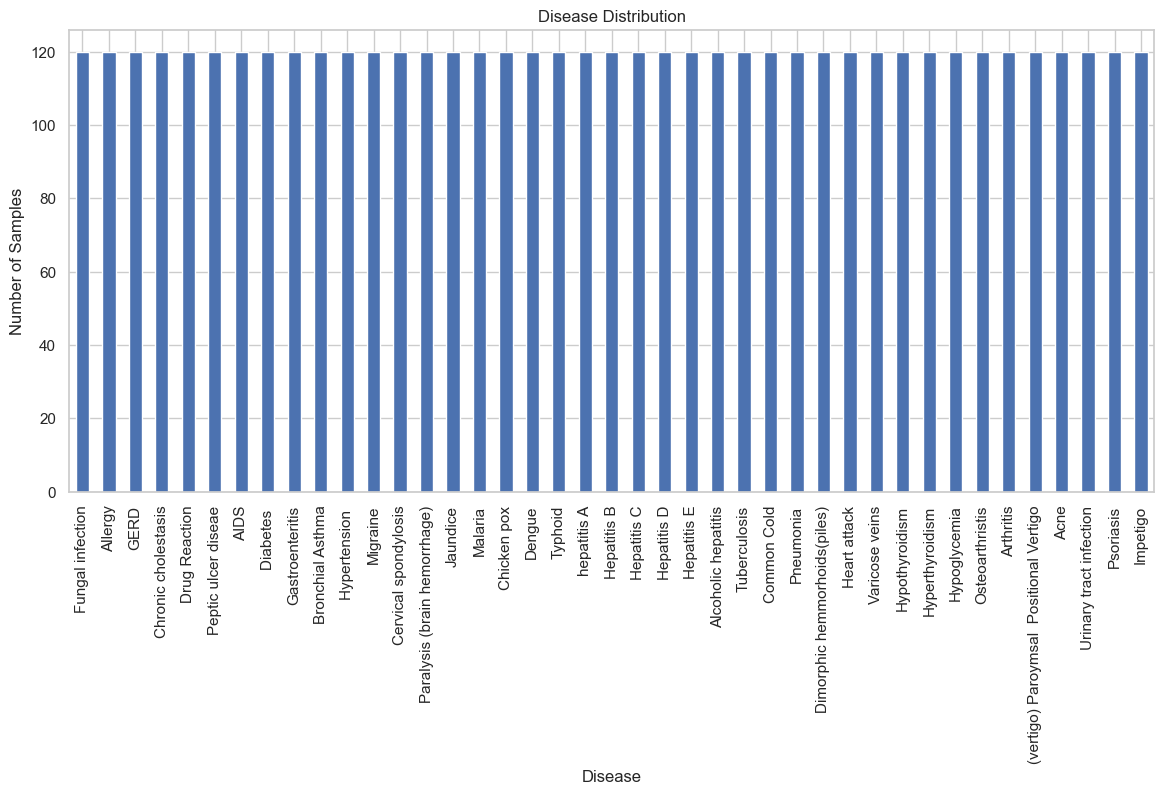

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
df["prognosis"].value_counts().plot(kind="bar")
plt.title("Disease Distribution")
plt.xlabel("Disease")
plt.ylabel("Number of Samples")
plt.show()


Class Distribution Analysis

The target variable (prognosis) is perfectly balanced, with each disease having the same number of samples. This eliminates class imbalance issues and strongly contributes to the model achieving very high accuracy. While this is beneficial for learning and experimentation, it does not reflect real-world medical data distributions.

In [9]:
symptom_cols = df.columns[:-1]  # exclude prognosis
df[symptom_cols].nunique().value_counts()


2    131
1      1
Name: count, dtype: int64

In [10]:
constant_features = df[symptom_cols].columns[df[symptom_cols].nunique() == 1]
constant_features


Index(['fluid_overload'], dtype='object')

Feature Variability Check

During EDA, one symptom feature was found to have only a single unique value across all samples, indicating zero variance. Such constant features do not contribute to model learning and can be safely removed during preprocessing. Tree-based models like Random Forest naturally ignore them, which is why model performance was unaffected.

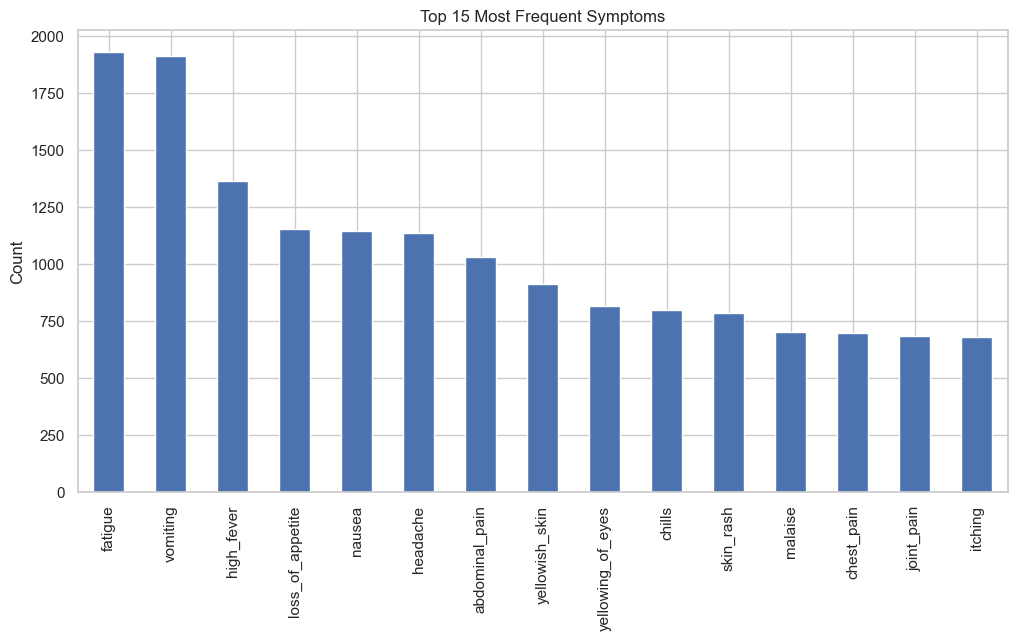

In [11]:
symptom_frequency = df[symptom_cols].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
symptom_frequency.head(15).plot(kind="bar")
plt.title("Top 15 Most Frequent Symptoms")
plt.ylabel("Count")
plt.show()


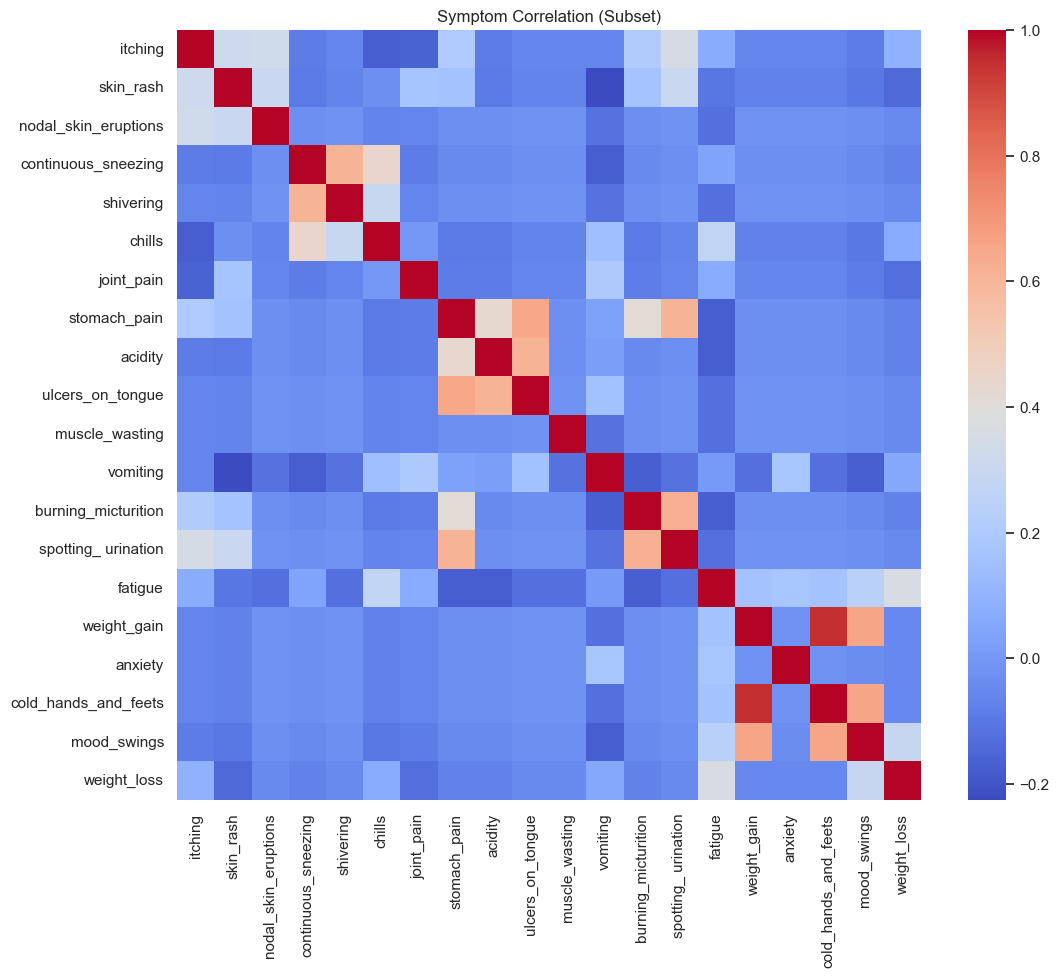

In [12]:
import seaborn as sns

plt.figure(figsize=(12, 10))
sns.heatmap(df[symptom_cols].corr().iloc[:20, :20], cmap="coolwarm")
plt.title("Symptom Correlation (Subset)")
plt.show()


Correlation Analysis

The correlation heatmap shows that most symptom features have weak correlations, indicating low multicollinearity. A few symptom groups exhibit moderate positive correlation, which is expected for clinically related symptoms (e.g., gastrointestinal or hormonal symptoms). No extreme correlations were observed, and tree-based models like Random Forest can effectively handle such feature relationships without requiring feature removal.